In [20]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

datadir='E:/Machine Learning/train'
#categories=['cat','dog']

#for category in categories:
#path=os.path(datadir) # path to cats and dogs directory

In [4]:
print(img_array.shape)

(374, 500)


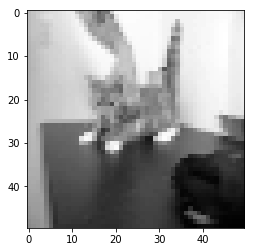

In [5]:
img_size=50

new_array=cv2.resize(img_array,(img_size,img_size))

plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
training_data=[]

def creating_training_data():
    for img in os.listdir(datadir):
        try:
            img_array=cv2.imread(os.path.join(datadir,img),cv2.IMREAD_GRAYSCALE)
            if img.startswith('cat'):
                class_num=0
            else:
                class_num=1
            new_array=cv2.resize(img_array,(img_size,img_size))
    
            training_data.append([new_array,class_num])
        except Exception as e:
            pass
creating_training_data()

In [8]:
print(len(training_data))

25000


In [9]:
import random
random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
0
0
1
0
1
1
0


In [11]:
x=[]
y=[]

for features, labels in training_data:
    x.append(features)
    y.append(labels)

x=np.array(x).reshape(-1,img_size,img_size,1)


In [17]:
import pickle

pickle_out=open('x.pickle','wb')
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out=open('y.pickle','wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [18]:
pickle_in=open('x.pickle','rb')
x=pickle.load(pickle_in)
pickle_in=open('y.pickle','rb')
y=pickle.load(pickle_in)

In [12]:
x=x/255.0

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten, MaxPooling2D

In [14]:
model=Sequential()

model.add(Conv2D(64, (3,3), input_shape=x.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x,y, batch_size=35, validation_split=0.1, epochs=10)

Instructions for updating:
Colocations handled automatically by placer.
Train on 22500 samples, validate on 2500 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
22500/22500 [==============================] - 838s 37ms/sample - loss: 0.6297 - acc: 0.6459 - val_loss: 0.5474 - val_acc: 0.7272
Epoch 2/10
22500/22500 [==============================] - 856s 38ms/sample - loss: 0.5415 - acc: 0.7301 - val_loss: 0.5062 - val_acc: 0.7596
Epoch 3/10
22500/22500 [==============================] - 460s 20ms/sample - loss: 0.5001 - acc: 0.7608 - val_loss: 0.4968 - val_acc: 0.7624
Epoch 4/10
22500/22500 [==============================] - 453s 20ms/sample - loss: 0.4711 - acc: 0.7806 - val_loss: 0.4651 - val_acc: 0.7880
Epoch 5/10
22500/22500 [==============================] - 454s 20ms/sample - loss: 0.4425 - acc: 0.7969 - val_loss: 0.4526 - val_acc: 0.7924
Epoch 6/10
22500/22500 [==============================] - 461s 21ms/sample - loss: 0.4188 - acc: 0.8095 - val_loss: 0.4493 - v

In [18]:
def prepare(filepath):
    img_size=50
    img_arr=cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_arr=cv2.resize(img_arr,( img_size, img_size))
    return new_arr.reshape(-1,img_size, img_size,1)
predictions=model.predict([prepare('E:/Machine Learning/dogs.jpg')])
if predictions==1:
    predictions='Dog'
else:
    predictions='Cat'

In [19]:
predictions

'Dog'